In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('employee_promotion.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [60]:
df.shape

(54808, 13)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [62]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [63]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [64]:
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [65]:
df['avg_training_score'].value_counts()

50.0    2716
49.0    2681
48.0    2437
51.0    2347
60.0    2155
59.0    2064
58.0    1898
52.0    1856
47.0    1746
62.0    1450
82.0    1447
57.0    1437
81.0    1357
53.0    1324
80.0    1206
83.0    1198
84.0    1168
79.0    1160
46.0    1136
85.0    1072
56.0    1070
70.0    1055
63.0    1021
69.0    1018
54.0     997
68.0     935
78.0     933
86.0     912
71.0     898
55.0     872
67.0     728
72.0     725
64.0     708
77.0     697
87.0     655
65.0     599
66.0     580
73.0     523
76.0     516
88.0     444
74.0     433
75.0     403
44.0     335
89.0     301
90.0     185
43.0     176
91.0     117
92.0      99
93.0      84
94.0      65
42.0      62
97.0      49
96.0      48
95.0      45
98.0      37
99.0      35
41.0      26
40.0       5
39.0       2
Name: avg_training_score, dtype: int64

In [66]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [67]:
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(),inplace=True)

In [68]:
df['avg_training_score'].fillna(df['avg_training_score'].mean(),inplace=True)

In [69]:
print(df['education'].mode())

0    Bachelor's
dtype: object


In [70]:
print(df['education'].mode()[0])

Bachelor's


In [71]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [72]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

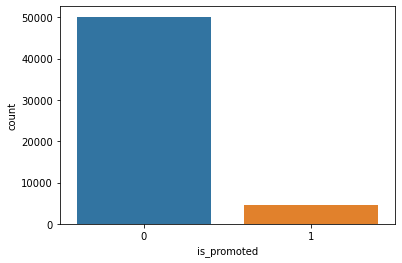

In [73]:
sns.countplot('is_promoted',data = df)

In [74]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [75]:
df = df.drop(columns='employee_id',axis = 1)

In [76]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [77]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

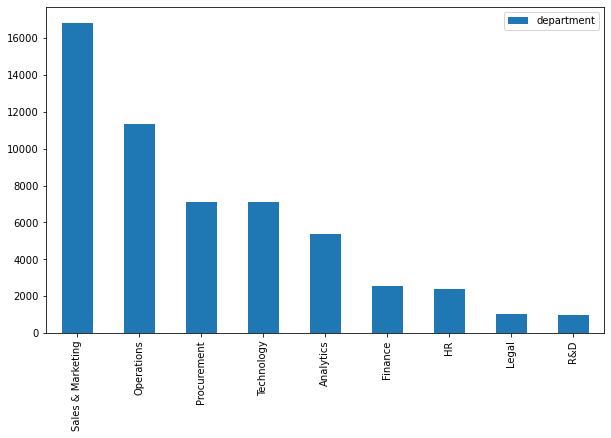

In [78]:
plt.figure(figsize=(10,6))
df['department'].value_counts().plot(kind='bar').legend()
plt.show()

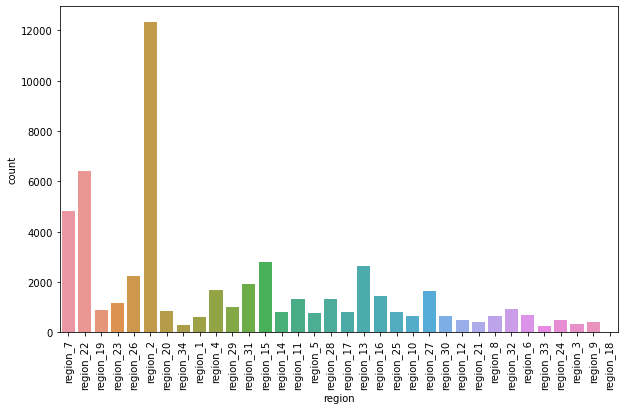

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='region')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='education', ylabel='count'>

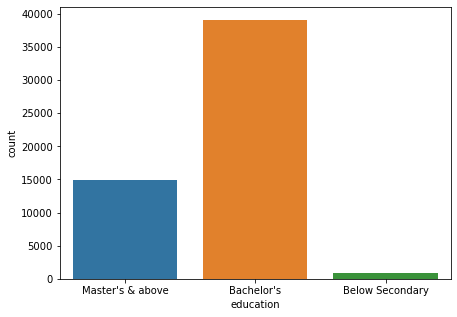

In [80]:
plt.figure(figsize=(7,5))
sns.countplot('education', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

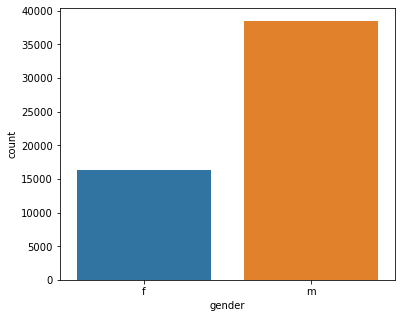

In [81]:
plt.figure(figsize=(6,5))
sns.countplot('gender', data=df)

<AxesSubplot:>

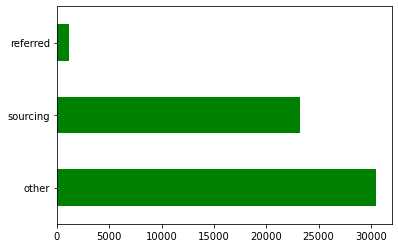

In [82]:
df['recruitment_channel'].value_counts().plot(kind='barh',color='green')

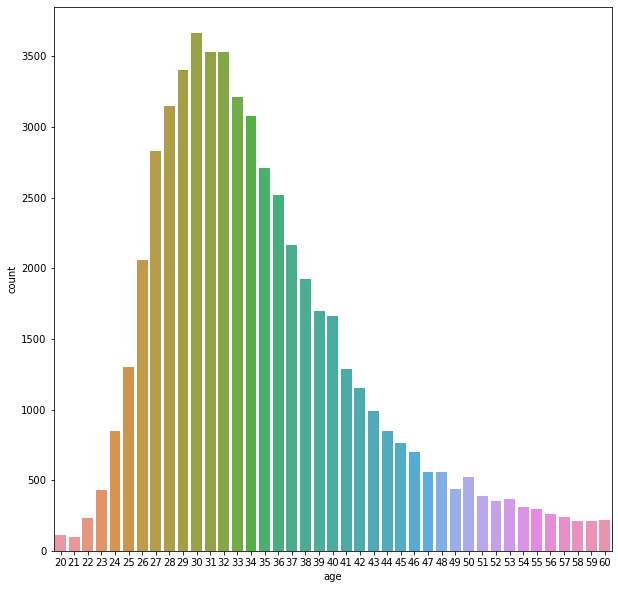

In [83]:
plt.figure(figsize=(10,10))
sns.countplot(df.age)
plt.show()

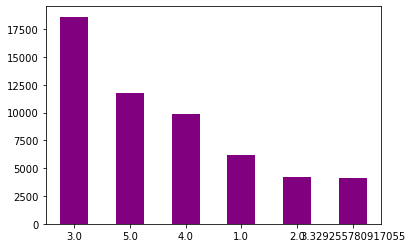

In [84]:
df['previous_year_rating'].value_counts().plot(kind='bar',color='purple')
plt.xticks(rotation=0)
plt.show()

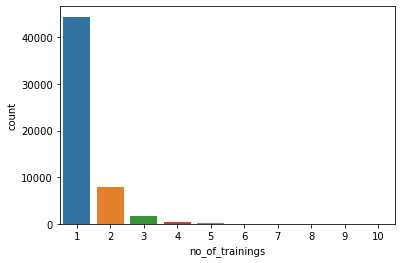

In [85]:
sns.countplot(df.no_of_trainings)
plt.show()

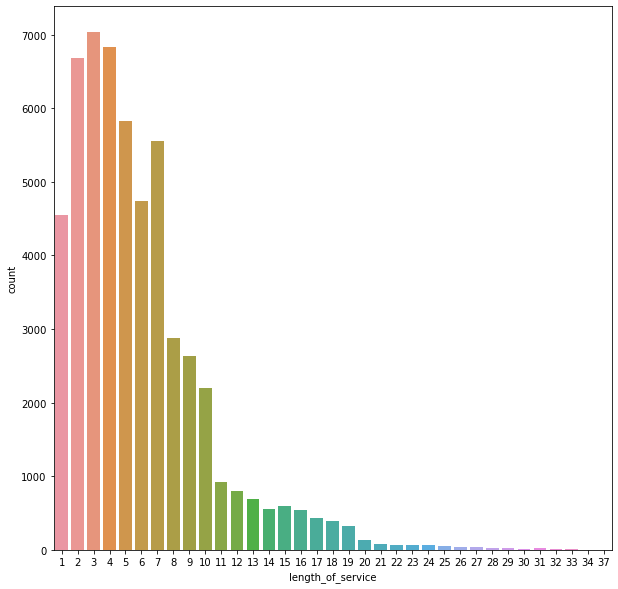

In [86]:
plt.figure(figsize=(10,10))
sns.countplot(df.length_of_service)
plt.show()

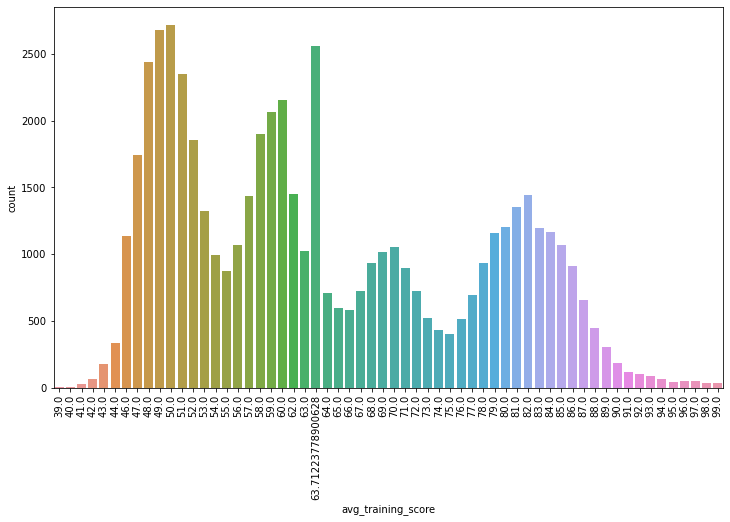

In [87]:
plt.figure(figsize=(12,7))
sns.countplot(df.avg_training_score)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

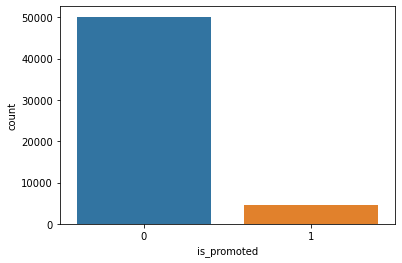

In [88]:
sns.countplot('is_promoted',data = df)

In [89]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


<AxesSubplot:xlabel='education', ylabel='count'>

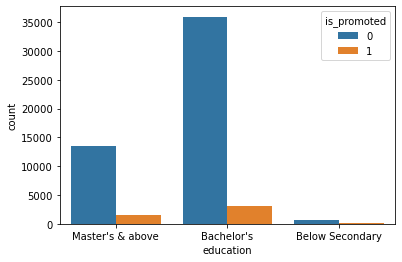

In [90]:
sns.countplot('education',hue='is_promoted',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

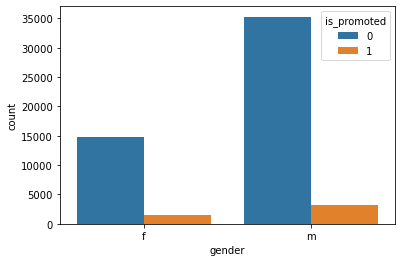

In [91]:
sns.countplot('gender',hue='is_promoted',data=df)

<AxesSubplot:xlabel='awards_won', ylabel='count'>

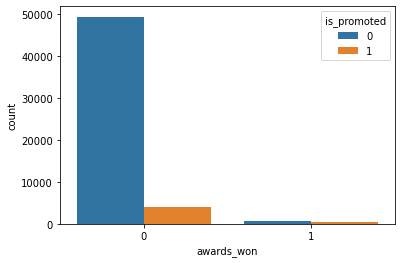

In [92]:
sns.countplot('awards_won',hue='is_promoted',data=df)

In [93]:
le = LabelEncoder()

In [94]:
df['department'] = le.fit_transform(df['department'])
df['gender'] = le.fit_transform(df['gender'])
df['education'] = le.fit_transform(df['education'].astype(str))
df['recruitment_channel'] = le.fit_transform(df['recruitment_channel'])
df['region']=le.fit_transform(df['region'])

In [95]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,8,18,0,1,0,1,45,3.0,2,0,73.0,0


In [96]:
cols = [ 'previous_year_rating', 'avg_training_score']
for col in cols:
   df[col] = df[col].apply(lambda x: int(x) if x == x else 0)

In [97]:
dc = df.corr()
dc

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
department,1.000000,-0.020592,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.135561,0.059060,-0.002151,-0.248411,0.000130
region,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.004590,-0.088918,-0.005977,-0.058939,0.000307,0.023830,0.008841
education,0.043441,-0.003815,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.027393,0.233666,-0.001409,0.031798,0.029257
gender,-0.030108,0.019730,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.024024,-0.019675,0.002381,-0.022761,-0.011109
recruitment_channel,0.004732,-0.000920,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.005731,-0.002887,-0.005510,-0.002650,0.002229
no_of_trainings,0.014152,-0.004590,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.061564,-0.057275,-0.007628,0.043739,-0.024896
age,0.079162,-0.088918,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.026810,0.657111,-0.008169,-0.048397,-0.017166
previous_year_rating,-0.135561,-0.005977,0.027393,-0.024024,0.005731,-0.061564,0.026810,1.000000,0.023504,0.026587,0.070351,0.153230
length_of_service,0.059060,-0.058939,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.023504,1.000000,-0.039927,-0.038469,-0.010670
awards_won,-0.002151,0.000307,-0.001409,0.002381,-0.005510,-0.007628,-0.008169,0.026587,-0.039927,1.000000,0.072791,0.195871


In [98]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [99]:
X = df[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score']]
Y = df[['is_promoted']]

In [100]:
print(X)

       department  region  education  gender  recruitment_channel  \
0               7      31          2       0                    2   
1               4      14          0       1                    0   
2               7      10          0       1                    2   
3               7      15          0       1                    0   
4               8      18          0       1                    0   
...           ...     ...        ...     ...                  ...   
54803           8       5          0       1                    2   
54804           4      19          2       0                    0   
54805           0       0          0       1                    0   
54806           7      33          0       1                    2   
54807           2      14          0       1                    0   

       no_of_trainings  age  previous_year_rating  length_of_service  \
0                    1   35                     5                  8   
1                    1   30

In [101]:
print(Y)

       is_promoted
0                0
1                0
2                0
3                0
4                0
...            ...
54803            0
54804            0
54805            0
54806            0
54807            0

[54808 rows x 1 columns]


In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [103]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38365, 11)
(38365, 1)
(16443, 11)
(16443, 1)


In [104]:
model = LogisticRegression(solver='liblinear')

In [105]:
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [106]:
pred = model.predict(X_train)

In [107]:
training_data_accuracy=accuracy_score(pred,Y_train)

In [108]:
print('Accuracy Score od Training Data: ',training_data_accuracy)

Accuracy Score od Training Data:  0.9186498110256744


In [109]:
pred1 = model.predict(X_test)

In [110]:
test_data_accuracy=accuracy_score(pred1,Y_test)

In [111]:
print('Accuracy Score on Test Data: ',test_data_accuracy)

Accuracy Score on Test Data:  0.9189320683573557


In [112]:
print('Accuracy Score on Training Data: ',training_data_accuracy*100,'%')
print('Accuracy Score on Test Data: ',test_data_accuracy*100,'%')

Accuracy Score on Training Data:  91.86498110256744 %
Accuracy Score on Test Data:  91.89320683573557 %
